In [32]:
import numpy as np
import pandas as pd
from  skimage.io import imread, imshow
from regresion_logistica import Regresion
import pywt
import pywt.data
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [23]:
def Hiperplano(x,w):
  # write your code here
  return np.dot(x,w.T)

def S(x,w):
  return 1 / (1 + np.exp(-Hiperplano(x,w)))

def Loss_function(x,y,w):
  # write your code here
  f1=y*np.log(S(x,w))
  f2=(1-y)*np.log(1-S(x,w))
  f3= np.sum(f1+f2)
  return -1/len(y)*(f3)

def Derivatives(x,y,w):
  # write your code here
  return np.matmul((y - S(x,w)),-x)/len(y)

def change_parameters(w, derivatives, alpha):
  # write your code here
  return w - alpha * derivatives  


class Regresion:
    def __init__(self, epocas,alpha):
        self.epocas=epocas
        self.alpha=alpha
        self.numero_clases=None
        self.w=None

    def train(self,x,y):
        num_samples, num_caracteristicas = x.shape
        self.numero_clases = len(np.unique(y))  
        self.w = np.zeros((self.numero_clases, num_caracteristicas))

        for i in range(self.epocas):
           for c in range(self.numero_clases):
              y_class = (y == c).astype(int)

              s=S(x,self.w[c])
              loss=s-y_class
              gradient = np.dot(x.T, loss) / num_samples
              self.w[c] -= self.alpha * gradient

    def predict(self,x):
       num_samples= x.shape[0]
       y_pred = np.zeros(num_samples, dtype=int)

       for i in range(num_samples):
            class_probs = [ S(x[i], self.w[c]) for c in range(self.numero_clases)]
            y_pred[i] = np.argmax(class_probs)

       return y_pred    

In [24]:


def Get_Feacture(picture, cortes):
  LL = picture
  for i in range(cortes):
     LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  return LL.flatten().tolist()

def cargar_dataset():

    carpeta_imagenes = '../imagenes_1/'

    # Se ordena los archivos segun el nombre asignado
    archivos = os.listdir(carpeta_imagenes)

    clases = []
    vectores_caracteristicos = []


    for archivo in archivos:
        # Verifica si el archivo es una imagen (puedes agregar más extensiones si es necesario)
        if archivo.endswith(('.png')):
            # Construye la ruta completa del archivo
            ruta_completa = os.path.join(carpeta_imagenes, archivo)
            imagen = imread(ruta_completa)

            # Se añade la clase correspondiente al vector clases 
            if int(archivo[1]) < 1:
                clases.append(int(archivo[2]))
            else:
                clases.append(int(archivo[1:3]))

            # Se añade el vector caracteristico de cada imagen
            vectores_caracteristicos.append(Get_Feacture(imagen, 2))

    return vectores_caracteristicos,clases

def acuary(y_prueba,y_correct):
    correctos= np.sum(y_prueba == y_correct)
    return (correctos/len(y_correct))*100      


In [25]:
x,y= cargar_dataset()
x=np.array(x)
y=np.array(y)

In [26]:
fold_accuracy = []

for k in range(5, 11, 5):

    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies=[]

    for train_idx, val_idx in kfold.split(x):
        X_train, X_val = x[train_idx], x[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the logistic regression model
        model = Regresion(700,0.00000001)
        model.train(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_val)
        accuracy = acuary(y_pred, y_val)
        
        # Append
        accuracies.append(accuracy)

    # Calcula la precisión promedio de cada fold
    average_accuracy = np.mean(accuracies)
    print(f'Precisión promedio: {average_accuracy:.2f}%')
    fold_accuracy.append(average_accuracy)


Precisión promedio: 32.45%
Precisión promedio: 34.38%


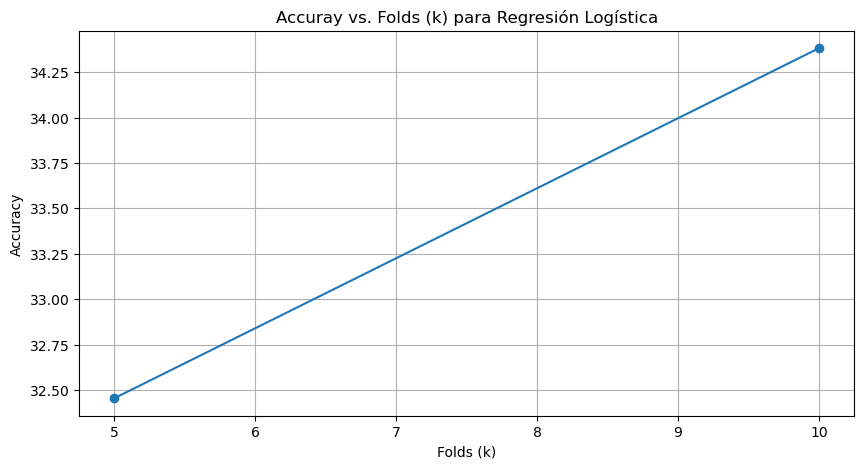

In [30]:
# Crea una gráfica de precisión vs. k
plt.figure(figsize=(10, 5))
plt.plot([5,10], fold_accuracy, marker='o')
plt.xlabel('Folds (k)')
plt.ylabel('Accuracy')
plt.title('Accuray vs. Folds (k) para Regresión Logística')
plt.grid(True)
plt.show()

In [33]:
# Genera y muestra el informe de clasificación
classification_rep = classification_report(y_val, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         8
           2       0.21      0.27      0.24        11
           3       0.00      0.00      0.00         5
           4       0.20      0.22      0.21         9
           5       0.50      0.36      0.42        11
           6       0.58      0.79      0.67        14
           7       0.44      0.50      0.47         8
           8       0.14      0.50      0.22         2
           9       0.75      0.33      0.46         9
          10       0.00      0.00      0.00         6

    accuracy                           0.39        83
   macro avg       0.32      0.35      0.31        83
weighted avg       0.38      0.39      0.37        83



c:\Users\pm114\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pm114\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pm114\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
